In [2]:
#import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import df
df= pd.read_csv(r"D:\Sciebo\TechLabs Track Data Science\Git\Abgeordnetenanalyse\project-wt-18-12-Abgeordnetenanalyse\MdB_indexed.csv")

In [4]:
df.head(5)

,WP-JAHRE,ID,GESCHLECHT,PARTEI_KURZ,GEBURTSDATUM,BERUF,GEBURTSLAND,NACHNAME,VORNAME,WAHLPERIODEN,...,WP13,WP14,WP15,WP16,WP17,WP18,WP19,WP-JAHRE.1,ANFANG,ALTER
0,1949-1953,11000009,1,CDU,1876,Bundeskanzler a. D.,Deutschland,Adenauer,Konrad,"['1', '2', '3', '4', '5']",...,0,0,0,0,0,0,0,1949-1953,1949,73
1,1949-1953,11000013,1,KPD,1904,"Bergmann, Gewerkschaftsfunktionär",Deutschland,Agatz,Willi,['1'],...,0,0,0,0,0,0,0,1949-1953,1949,45
2,1949-1953,11000015,1,DP,1879,Kapitän a. D.,Deutschland,Ahrens,Adolf,['1'],...,0,0,0,0,0,0,0,1949-1953,1949,70
3,1949-1953,11000020,1,CDU,1890,Geschäftsführer,Deutschland,Albers,Johannes,"['1', '2']",...,0,0,0,0,0,0,0,1949-1953,1949,59
4,1949-1953,11000021,0,SPD,1901,Buchhalterin,Deutschland,Albertz,Luise,"['1', '2', '3', '4', '5']",...,0,0,0,0,0,0,0,1949-1953,1949,48


In [5]:
df.tail(5)

,WP-JAHRE,ID,GESCHLECHT,PARTEI_KURZ,GEBURTSDATUM,BERUF,GEBURTSLAND,NACHNAME,VORNAME,WAHLPERIODEN,...,WP13,WP14,WP15,WP16,WP17,WP18,WP19,WP-JAHRE.1,ANFANG,ALTER
11595,2017-,11004936,1,AfD,1963,Rechtsanwalt,Deutschland,Wirth,Christian,['19'],...,0,0,0,0,0,0,1,2017-,2017,54
11596,2017-,11004937,1,AfD,1959,"Dipl.-Personalwirt, Betriebsschlosser, Staatl....",Deutschland,Witt,Uwe,['19'],...,0,0,0,0,0,0,1,2017-,2017,58
11597,2017-,11004938,1,CDU,1985,Angestellter / Student,Deutschland,Ziemiak,Paul,['19'],...,0,0,0,0,0,0,1,2017-,2017,32
11598,2017-,11004941,0,FDP,1989,Politikwissenschaftlerin,Deutschland,Jensen,Gyde,['19'],...,0,0,0,0,0,0,1,2017-,2017,28
11599,2017-,11004942,0,SPD,1984,Studienrätin,Deutschland,Völlers,Marja-Liisa,['19'],...,0,0,0,0,0,0,1,2017-,2017,33


Text(0, 0.5, 'Anzahl')

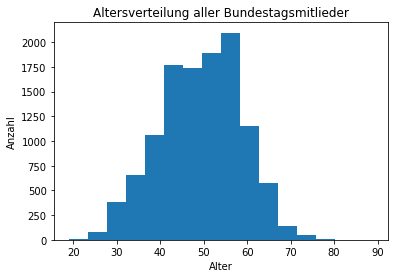

In [6]:
#Altersverteilung aller aufgeführten Bundestagsmitglieder, Anzahl von Alter bei Eintritt 
df.ALTER.plot( kind= "hist" ,title="Altersverteilung aller Bundestagsmitlieder", bins=16)
plt.xlabel("Alter")
plt.ylabel("Anzahl")

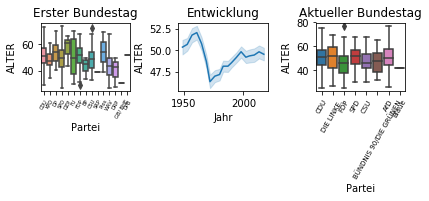

In [132]:
#Gegenüberstellung Altersverteilung nach Partei erster vs. aktueller Bundestag mit Durchschnittsentwicklung
df_copy=  df[df.ANFANG == 2017]
df_copy_1=  df[df.ANFANG == 1949]

fig=plt.figure()

ax1=fig.add_subplot(2,3,1)
sns.boxplot(df_copy_1["PARTEI_KURZ"],df_copy_1["ALTER"])
plt.title("Erster Bundestag")
plt.xticks(rotation=60,size=5)
plt.xlabel("Partei")

ax2=fig.add_subplot(2,3,2)
sns.lineplot(x="ANFANG", y="ALTER", data=df)
plt.xlabel("Jahr")
plt.title("Entwicklung")

ax3=fig.add_subplot(2,3,3)
sns.boxplot(df_copy["PARTEI_KURZ"],df_copy["ALTER"])
plt.title("Aktueller Bundestag")
plt.xticks(rotation=60, size=7)
plt.xlabel("Partei")

fig.tight_layout()

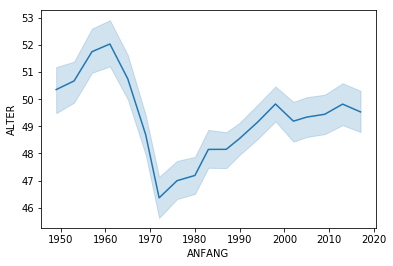

In [7]:
#Entwicklung Durchscnittsalter einzeln
sns.lineplot(x="ANFANG", y="ALTER", data=df)


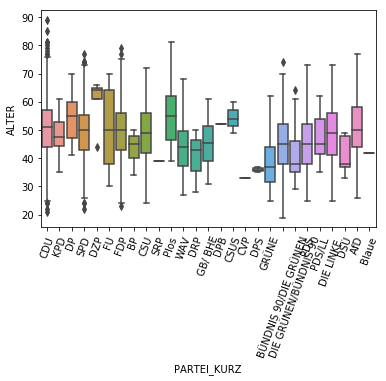

In [8]:
#Boxplot der Altersverteilungen nach Parteien über den gesamten Zeitraum
sns.boxplot(df["PARTEI_KURZ"],df["ALTER"])
plt.xticks(rotation=70)
plt.rcParams["xtick.labelsize"]=15

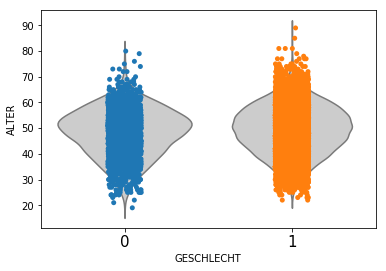

In [9]:
#Kombinierter Plot aus violin + stripplot für die Altersverteilung nach Geschlecht über gesamten Zeitraum
ax= sns.violinplot(df["GESCHLECHT"],df["ALTER"],inner=None, color=".8")

ax= sns.stripplot(df["GESCHLECHT"],df["ALTER"],jitter=True)
plt.rcParams["xtick.labelsize"]=13

Text(0, 0.5, 'Jahr')

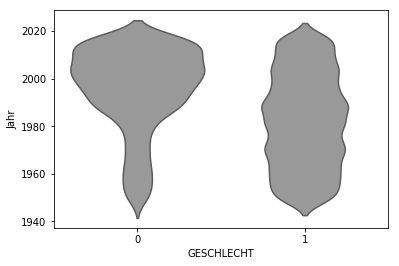

In [147]:
#Vergleich Geschlechteranteil nach Jahren
#für Anzeige M/W DF Veränderung notwendig?
sns.violinplot("GESCHLECHT","ANFANG", data=df, inner=None, color=".6")
plt.ylabel("Jahr")

Text(0, 0.5, 'Männernateil %')

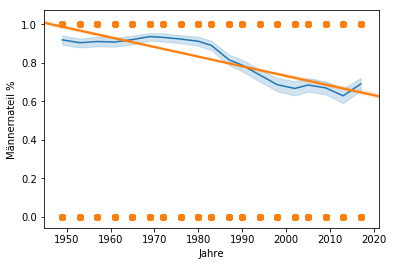

In [138]:
# Männeranteil prozentual nach Jahrenmir Regressionsgeraden
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df)


sns.regplot("ANFANG","GESCHLECHT", data=df, scatter=True, fit_reg=True)
plt.xlabel("Jahre")
plt.ylabel("Männernateil %")

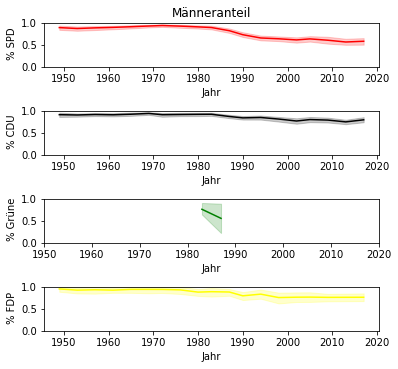

In [139]:
# Männeranteil prozentual nach Jahren und Parteien
df_copy_SPD= df[df.PARTEI_KURZ == "SPD"]
df_copy_CDU= df[df.PARTEI_KURZ == "CDU"]
df_copy_GRÜNE= df[df.PARTEI_KURZ == "GRÜNE"]
df_copy_FDP= df[df.PARTEI_KURZ == "FDP"]
#df_copy_LINKE= df[df.PARTEI_KURZ == "LINKE"]

fig= plt.figure()

ax1=fig.add_subplot(5,1,1)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_copy_SPD, color="red")
plt.xlabel("Jahr")
plt.ylabel(" % SPD")
plt.ylim(0,1)
plt.title("Männeranteil")

ax2=fig.add_subplot(5,1,2)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_copy_CDU, color="black")
plt.xlabel("Jahr")
plt.ylabel(" % CDU")
plt.ylim(0,1)

ax3=fig.add_subplot(5,1,3)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_copy_GRÜNE, color="green")
plt.xlabel("Jahr")
plt.ylabel(" % Grüne")
plt.ylim(0,1)
plt.xlim(1950,2020)

ax4=fig.add_subplot(5,1,4)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_copy_FDP, color="yellow")
plt.xlabel("Jahr")
plt.ylabel(" % FDP")
plt.ylim(0,1)

#ax5=fig.add_subplot(5,1,5)
#sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_copy_LINKE, color="red")
#plt.xlabel("Jahr")
#plt.ylabel(" % LINKE")
#plt.ylim(0,1)


fig.subplots_adjust(wspace=5, hspace=1,top=1.5)


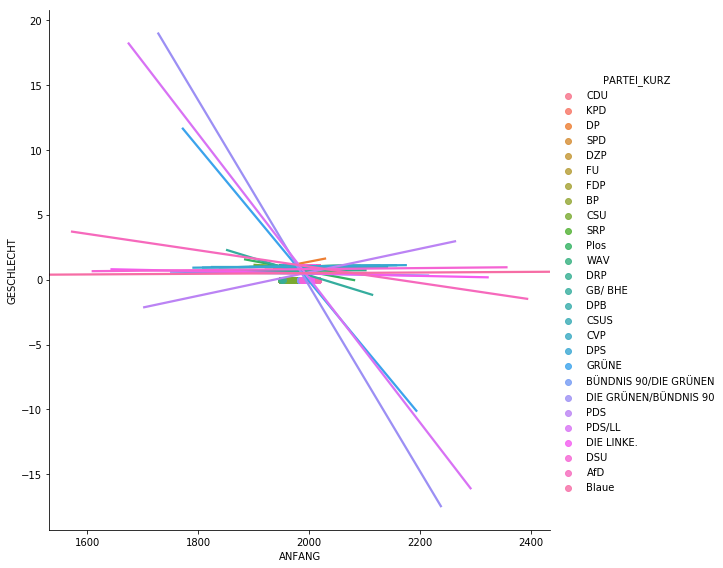

In [27]:
#lmplot zur geschlehchtverteilung in den einzelnen Parteien über die Jahre, keine statistische Basis/Aussagekraft
sns.lmplot("ANFANG","GESCHLECHT",  hue="PARTEI_KURZ", data=df, ci=None, height=8)
plt.rcParams["xtick.labelsize"]=10   

#Code Einzeldarstellung
#sns.lmplot("ANFANG","GESCHLECHT", col="PARTEI_KURZ", hue="PARTEI_KURZ", data=df, ci=None, height=8)